In [3]:
import pandas as pd
import numpy as np

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
theft_data = pd.read_csv('/Users/Xiaowei_Dai/Desktop/STDM/Coursework/chicago_crime_theft_filtered.csv')

In [28]:
theft_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647373,HM244805,2006-03-21 16:45:00,011XX N SPAULDING AVE,810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,26.0,23.0,6,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
1,4647374,HM245851,2006-03-21 22:00:00,080XX S DOBSON AVE,820,THEFT,$500 AND UNDER,STREET,False,False,...,8.0,44.0,6,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"
2,4647408,HM246001,2006-03-22 00:20:00,015XX N MILWAUKEE AVE,890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1.0,24.0,6,1163416.0,1910072.0,2006,04/15/2016 08:55:02 AM,41.908877,-87.675121,"(41.908876749, -87.675120839)"
3,4647416,HM246061,2006-02-03 11:00:00,045XX N SHERIDAN RD,890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,46.0,3.0,6,1168795.0,1930288.0,2006,04/15/2016 08:55:02 AM,41.964235,-87.654773,"(41.964235418, -87.654773202)"
4,4647417,HM244872,2006-03-21 16:44:22,082XX S CALUMET AVE,810,THEFT,OVER $500,STREET,False,False,...,6.0,44.0,6,1179906.0,1850439.0,2006,04/15/2016 08:55:02 AM,41.744876,-87.616373,"(41.74487608, -87.6163731)"


In [31]:
# Drop rows that have 2018 as the year.
theft_crime = pd.DataFrame(crime_data[crime_data['Year'] != 2018])
theft_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647373,HM244805,2006-03-21 16:45:00,011XX N SPAULDING AVE,810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,26.0,23.0,6,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
1,4647374,HM245851,2006-03-21 22:00:00,080XX S DOBSON AVE,820,THEFT,$500 AND UNDER,STREET,False,False,...,8.0,44.0,6,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"
2,4647408,HM246001,2006-03-22 00:20:00,015XX N MILWAUKEE AVE,890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1.0,24.0,6,1163416.0,1910072.0,2006,04/15/2016 08:55:02 AM,41.908877,-87.675121,"(41.908876749, -87.675120839)"
3,4647416,HM246061,2006-02-03 11:00:00,045XX N SHERIDAN RD,890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,46.0,3.0,6,1168795.0,1930288.0,2006,04/15/2016 08:55:02 AM,41.964235,-87.654773,"(41.964235418, -87.654773202)"
4,4647417,HM244872,2006-03-21 16:44:22,082XX S CALUMET AVE,810,THEFT,OVER $500,STREET,False,False,...,6.0,44.0,6,1179906.0,1850439.0,2006,04/15/2016 08:55:02 AM,41.744876,-87.616373,"(41.74487608, -87.6163731)"


In [34]:
# Check filerted Crime type and calculate count
theft_count = pd.DataFrame(theft_crime.groupby('Primary Type').size().sort_values(ascending=False).rename('Count').reset_index())
theft_count.head()

,Primary Type,Count
0,THEFT,1340438


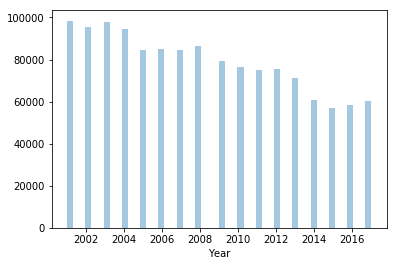

In [37]:
#plot the graph
sns.distplot(theft_crime['Year'], kde= False)
plt.show()

In [45]:
# Group by District and calculate count
crime_district = pd.DataFrame(theft_crime.groupby('District').size().sort_values(ascending=False).rename('Count').reset_index())
crime_district.head()

,District,Count
0,18.0,117108
1,1.0,107341
2,19.0,95345
3,12.0,88507
4,8.0,86052


In [47]:
crime_district.shape

(25, 2)

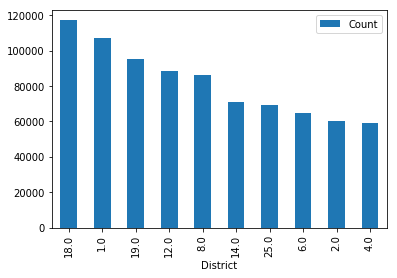

In [42]:
#Plot top 10 theft districts
crime_district[:10].plot(x='District',y='Count',kind='bar')

In [52]:
#convert the 'Date' column into a date format that is understandable by Python

# convert dates to pandas datetime format
theft_crime.Date = pd.to_datetime(theft_crime.Date, format='%Y-%m-%d %H:%M:%S')

# setting the index to be the date will help us a lot later on
theft_crime.index = pd.DatetimeIndex(theft_crime.Date)

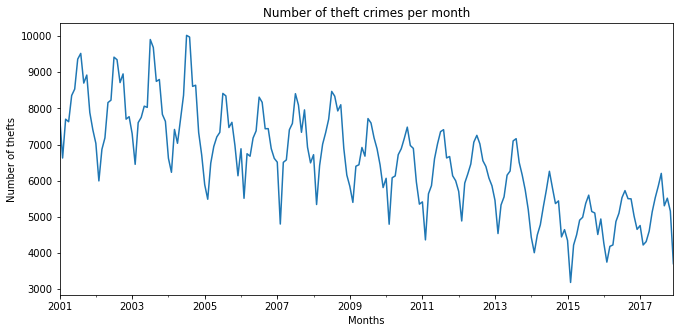

In [53]:
#Begin from how many records we have for each month
plt.figure(figsize=(11,5))
theft_crime.resample('M').size().plot(legend=False)
plt.title('Number of theft crimes per month')
plt.xlabel('Months')
plt.ylabel('Number of thefts')
plt.show()

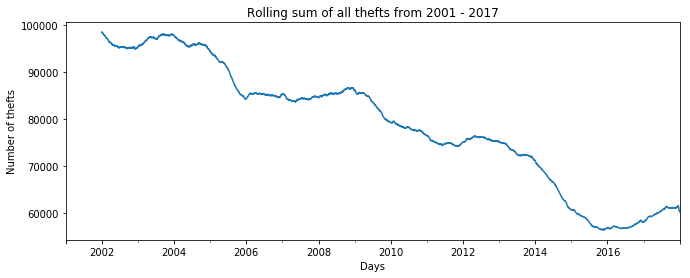

In [55]:
#Observe its tendency from 2001 to 2017
plt.figure(figsize=(11,4))
theft_crime.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all thefts from 2001 - 2017')
plt.ylabel('Number of thefts')
plt.xlabel('Days')
plt.show()

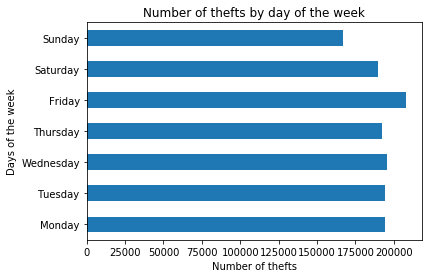

In [56]:
#Observe difference between different days of the week
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
theft_crime.groupby([theft_crime.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of thefts')
plt.title('Number of thefts by day of the week')
plt.show()

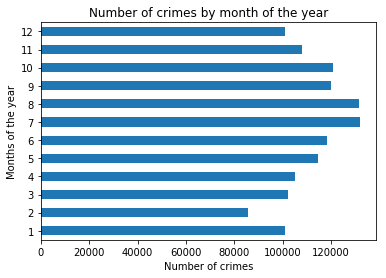

In [57]:
#Observe difference between different months of the year
theft_crime.groupby([theft_crime.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of thefts')
plt.title('Number of thefts by month of the year')
plt.show()

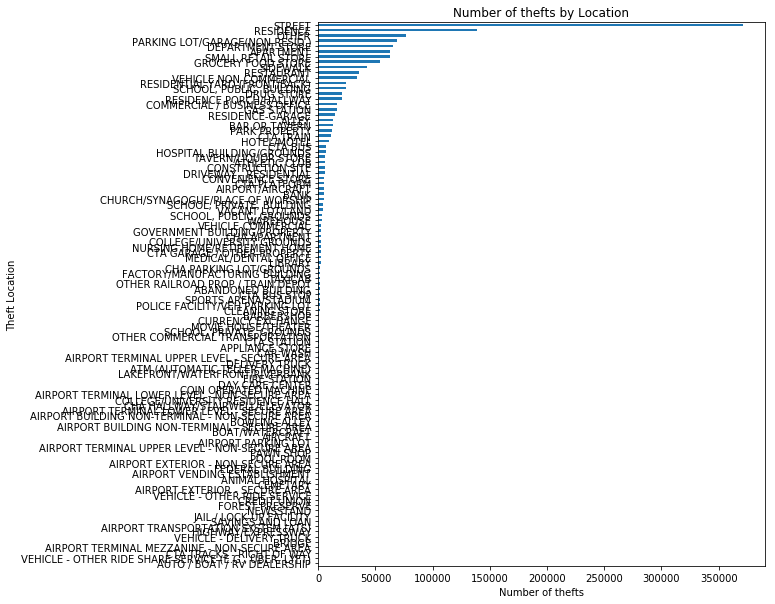

In [59]:
plt.figure(figsize=(8,10))
theft_crime.groupby([theft_crime['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of thefts by Location')
plt.ylabel('Theft Location')
plt.xlabel('Number of thefts')
plt.show()

In [65]:
theft_crime[['X Coordinate', 'Y Coordinate']] = theft_crime[['X Coordinate', 'Y Coordinate']].replace(0, np.nan)
theft_crime.dropna()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-21 16:45:00,4647373,HM244805,2006-03-21 16:45:00,011XX N SPAULDING AVE,810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,26.0,23.0,6,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
2006-03-21 22:00:00,4647374,HM245851,2006-03-21 22:00:00,080XX S DOBSON AVE,820,THEFT,$500 AND UNDER,STREET,False,False,...,8.0,44.0,6,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"
2006-03-22 00:20:00,4647408,HM246001,2006-03-22 00:20:00,015XX N MILWAUKEE AVE,890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1.0,24.0,6,1163416.0,1910072.0,2006,04/15/2016 08:55:02 AM,41.908877,-87.675121,"(41.908876749, -87.675120839)"
2006-02-03 11:00:00,4647416,HM246061,2006-02-03 11:00:00,045XX N SHERIDAN RD,890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,46.0,3.0,6,1168795.0,1930288.0,2006,04/15/2016 08:55:02 AM,41.964235,-87.654773,"(41.964235418, -87.654773202)"
2006-03-21 16:44:22,4647417,HM244872,2006-03-21 16:44:22,082XX S CALUMET AVE,810,THEFT,OVER $500,STREET,False,False,...,6.0,44.0,6,1179906.0,1850439.0,2006,04/15/2016 08:55:02 AM,41.744876,-87.616373,"(41.74487608, -87.6163731)"
2006-03-21 17:30:31,4647427,HM244897,2006-03-21 17:30:31,079XX S COTTAGE GROVE AVE,890,THEFT,FROM BUILDING,BARBERSHOP,False,False,...,8.0,44.0,6,1182930.0,1852607.0,2006,04/15/2016 08:55:02 AM,41.750756,-87.605226,"(41.750755629, -87.605225614)"
2006-03-21 12:00:00,4647434,HM246006,2006-03-21 12:00:00,008XX S INDEPENDENCE BLVD,820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,24.0,27.0,6,1151391.0,1895988.0,2006,04/15/2016 08:55:02 AM,41.870474,-87.719665,"(41.870473514, -87.719665258)"
2006-03-20 14:35:00,4647436,HM245076,2006-03-20 14:35:00,084XX S KERFOOT AVE,820,THEFT,$500 AND UNDER,"SCHOOL, PUBLIC, GROUNDS",False,False,...,21.0,71.0,6,1173450.0,1848991.0,2006,04/15/2016 08:55:02 AM,41.741048,-87.640071,"(41.741047754, -87.64007146)"
2006-03-22 09:00:00,4647437,HM245938,2006-03-22 09:00:00,059XX S EMERALD AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,False,...,20.0,68.0,6,1172311.0,1865560.0,2006,04/15/2016 08:55:02 AM,41.786540,-87.643758,"(41.786540224, -87.643757991)"


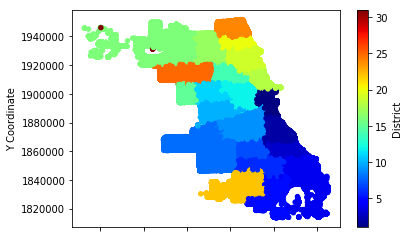

In [66]:
#theft_crime happened in different districts
theft_crime.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', c='District', cmap=plt.get_cmap('jet'))

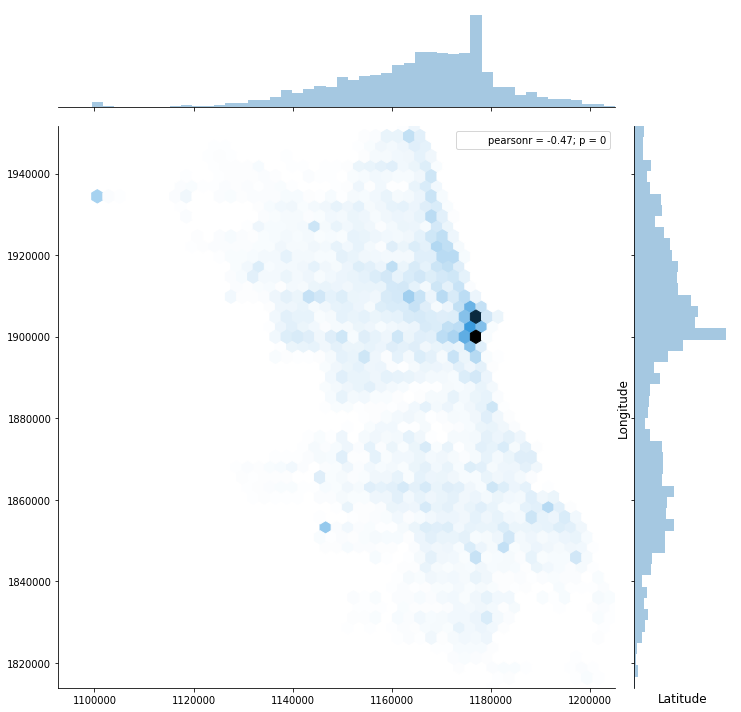

In [68]:
# if any clusters are formed or if any areas are more prone to crime than others
plt.figure(figsize=(12,12))
sns.jointplot(x=theft_crime['X Coordinate'].values, y=theft_crime['Y Coordinate'].values, size=10, kind='hex')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

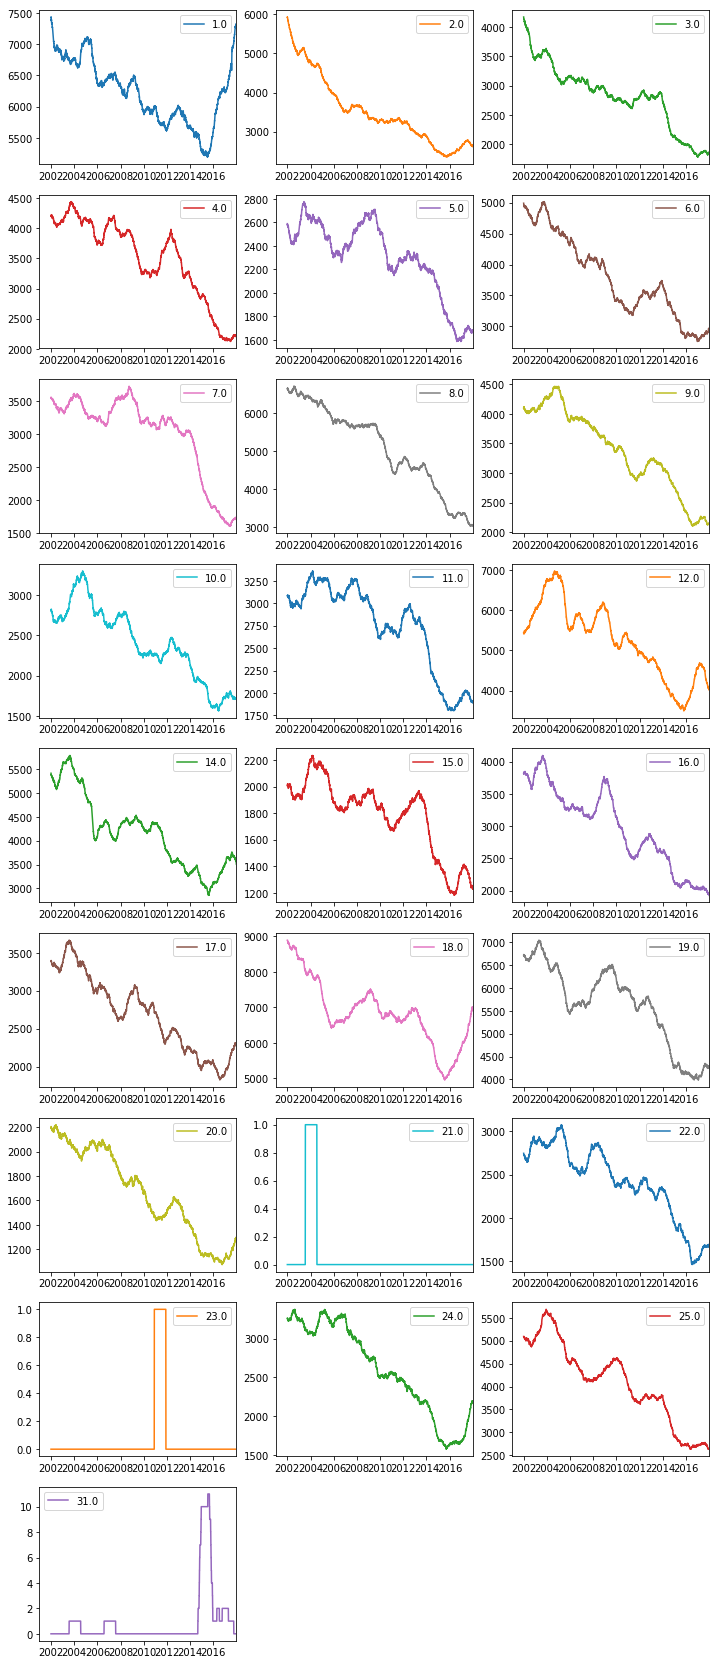

In [70]:
#Theft happens per district
#little confused about district 21,23,31. Maybe these districts can be eliminated in the data-prepossing part
crimes_per_district = theft_crime.pivot_table('Date', aggfunc=np.size, columns='District', index=theft_crime.index.date, fill_value=0)
crimes_per_district.index = pd.DatetimeIndex(crimes_per_district.index)
plo = crimes_per_district.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)